In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#MODELO 2: KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report



## DATAFRAME

In [47]:
df = pd.read_csv("../data/processed/limpio1.csv")
df.head(1)

,Stress,Age,Hair Loss,Genetics_encoder,Hormones_encoder,HairCare_encoder,Environment_encoder,Smoking_encoder,Weight_encoder,Nutritional Deficiencies _Biotin Deficiency,...,Medications & Treatments_Antibiotics,Medications & Treatments_Antidepressants,Medications & Treatments_Antifungal Cream,Medications & Treatments_Blood Pressure Medication,Medications & Treatments_Chemotherapy,Medications & Treatments_Heart Medication,Medications & Treatments_Immunomodulators,Medications & Treatments_No Data,Medications & Treatments_Rogaine,Medications & Treatments_Steroids
0,1,19,0,1.0,0.0,1.0,1.0,0.0,0.0,False,...,False,False,False,False,False,False,False,True,False,False


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 42 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Stress                                              999 non-null    int64  
 1   Age                                                 999 non-null    int64  
 2   Hair Loss                                           999 non-null    int64  
 3   Genetics_encoder                                    999 non-null    float64
 4   Hormones_encoder                                    999 non-null    float64
 5   HairCare_encoder                                    999 non-null    float64
 6   Environment_encoder                                 999 non-null    float64
 7   Smoking_encoder                                     999 non-null    float64
 8   Weight_encoder                                      999 non-null    float64
 9  

## Train/test

In [49]:
X = df.drop(columns = ["Hair Loss"])
y = df["Hair Loss"]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(799, 41)
(799,)
(200, 41)
(200,)


## Escalado

In [51]:
minmax_scaler = MinMaxScaler()

minmax_scaler.fit(X_train)

X_train_scaled = minmax_scaler.transform(X_train)
X_test_scaled = minmax_scaler.transform(X_test)

## Entrenamiento

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

## Predicciones

In [53]:
pred = knn.predict(X_test_scaled)

print("Accuracy: ", accuracy_score(y_test, pred))
print("precision: ", precision_score(y_test, pred))
print("Recall: ", recall_score(y_test, pred))

Accuracy:  0.46
precision:  0.42592592592592593
Recall:  0.5


<Axes: >

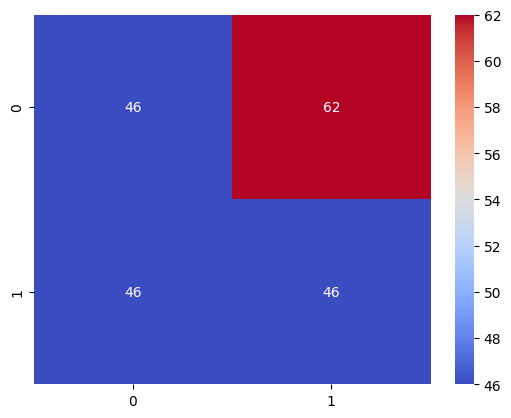

In [54]:
sns.heatmap(confusion_matrix(y_test, pred), cmap = "coolwarm",annot= True)

In [55]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.50      0.43      0.46       108
           1       0.43      0.50      0.46        92

    accuracy                           0.46       200
   macro avg       0.46      0.46      0.46       200
weighted avg       0.47      0.46      0.46       200



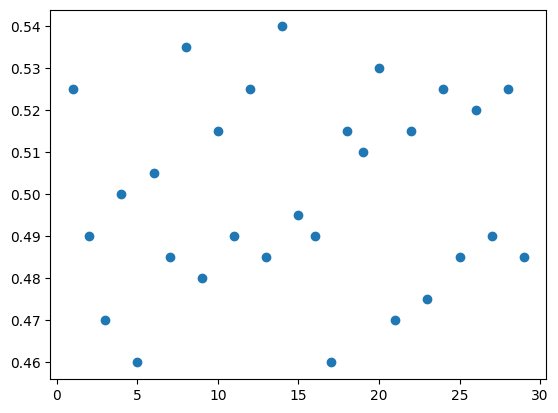

In [56]:
k_range = range(1,30)
scores = []

for i in k_range:
    knn =KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_scaled, y_train)
    pred_scores = knn.score(X_test_scaled, y_test)
    scores.append(pred_scores)

plt.scatter(k_range, scores)

In [57]:
scores

[0.525,
 0.49,
 0.47,
 0.5,
 0.46,
 0.505,
 0.485,
 0.535,
 0.48,
 0.515,
 0.49,
 0.525,
 0.485,
 0.54,
 0.495,
 0.49,
 0.46,
 0.515,
 0.51,
 0.53,
 0.47,
 0.515,
 0.475,
 0.525,
 0.485,
 0.52,
 0.49,
 0.525,
 0.485]

## PKL

In [58]:
import pickle

# Guardar MinMaxScaler
with open('../models/M2_minmax_scaler.pkl', 'wb') as f:
    pickle.dump(minmax_scaler, f)

# Guardar el modelo KNN
with open('../models/M2_KNN.pkl', 'wb') as f:
    pickle.dump(knn, f)


In [59]:
with open('../models/M2_minmax_scaler.pkl', 'rb') as f:
    minmax_scaler_loaded = pickle.load(f)

# Cargar el modelo KNN
with open('../models/M2_KNN.pkl', 'rb') as f:
    knn_loaded = pickle.load(f)


In [60]:
#usar para predecir

# Escalar los datos nuevos con el scaler cargado
X_test_scaled = minmax_scaler_loaded.transform(X_test)

# Hacer predicciones con el modelo cargado
y_pred = knn_loaded.predict(X_test_scaled)
